In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls

gdrive	sample_data


In [ ]:
%cd gdrive/MyDrive/VehicleDetction/darknet/

/content/gdrive/MyDrive/VehicleDetction/darknet


In [ ]:
!ls

backup		   demo1.ipynb	  LICENSE.fuck	Makefile	 scripts
cfg		   examples	  LICENSE.gen	obj		 src
custom_data	   include	  LICENSE.gpl	predictions.jpg  yolov3.weights
darknet		   libdarknet.a   LICENSE.meta	python
darknet53.conv.74  libdarknet.so  LICENSE.mit	README.md
data		   LICENSE	  LICENSE.v1	results


In [ ]:
!chmod 

chmod: missing operand
Try 'chmod --help' for more information.


In [ ]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from glob import glob
import shutil


In [ ]:
img = np.array(Image.open("custom_data/images/car/000000566249.jpg"),dtype = np.uint8)

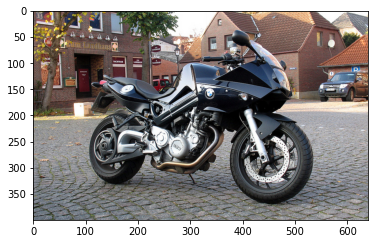

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
def splitData(myDir = "images/motorcycle/"):
  try:
    mycat = myDir.split('/')[-2]
    print("curently in ", mycat)
    myFiles = glob(myDir + "*.jpg")
    trainData = len(myFiles) * 0.80
    testdata = len(myFiles) * 0.20
    

    print("Total Images in " + mycat,len(myFiles))
    print("Total Images for training",int(trainData))
    print("Total Images for validation",int(testdata))

    with open("train.txt",'a') as trainfile:
      for eachImg in myFiles[:int(trainData)]:
        trainfile.write( "custom_data" + "/" + eachImg + "\n")
    
    with open("test.txt",'a') as testfile:
      for eachImg in myFiles[int(trainData):]:
        testfile.write( "custom_data" + "/" + eachImg + "\n")
    
    



    
  except Exception as ex:
    print("Error in split data",str(ex))


def lengthofFolder(mypath ):
  try:
    ff = glob(mypath + "*.txt")
    print("Total files are",len(ff))

    return len(ff)

  except Exception as ex:
    print("pass")


In [ ]:
!ls


backup		   demo1.ipynb	  LICENSE.fuck	Makefile	 scripts
cfg		   examples	  LICENSE.gen	obj		 src
custom_data	   include	  LICENSE.gpl	predictions.jpg  yolov3.weights
darknet		   libdarknet.a   LICENSE.meta	python
darknet53.conv.74  libdarknet.so  LICENSE.mit	README.md
data		   LICENSE	  LICENSE.v1	results


In [ ]:
lengthofFolder(mypath = "custom_data/labels/bicycle/")

Total files are 3251


3251

In [ ]:
def moveFiles(directory):
  try:
    mycat = directory.split('/')[-2]
    myAlltxtf = glob(directory + "*.txt")
    print("length of txt files in "+ mycat,len(myAlltxtf))
    for eachF in myAlltxtf:
      # print("each",eachF)
      filename = eachF.split('/')[-1] 
      # print("filename","custom_data/labels/"+filename)
      shutil.move(eachF,"custom_data/labels/"+filename)
    
    print("Done!!!!!!!!!!!!!!!!")



  except Exception as ex:
    print("Error in moveFiles",str(ex))
  

In [ ]:
!chmod +x darknet

In [ ]:
!make

gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -DCUDNN  -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -c ./src/gemm.c -o obj/gemm.o
./src/gemm.c: In function ‘time_gpu’:
./src/gemm.c:232:9: warning: ‘cudaThreadSynchronize’ is deprecated [-Wdeprecated-declarations]
         cudaThreadSynchronize();
         ^~~~~~~~~~~~~~~~~~~~~
In file included from /usr/local/cuda/include/cuda_runtime.h:96:0,
                 from include/darknet.h:11,
                 from ./src/utils.h:5,
                 from ./src/gemm.c:2:
/usr/local/cuda/include/cuda_runtime_api.h:957:57: note: declared here
 extern __CUDA_DEPRECATED __host__ cudaError_t CUDARTAPI cudaThreadSynchronize(void);
                                                         ^~~~~~~~~~~~~~~~~~~~~
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -DCUDNN  -Wall -Wno-unused-result -Wno-unknown-pragmas

In [ ]:
import tensorflow as tf

In [ ]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
!./darknet detector train custom_data/detector.data custom_data/cfg/yolov3.cfg backup/yolov3_13500.weights



Streaming output truncated to the last 5000 lines.
Region 94 Avg IOU: 0.777611, Class: 0.775078, Obj: 0.223313, No Obj: 0.000598, .5R: 1.000000, .75R: 0.714286,  count: 7
Region 106 Avg IOU: 0.568690, Class: 0.722324, Obj: 0.233893, No Obj: 0.000398, .5R: 0.727273, .75R: 0.181818,  count: 11
Region 82 Avg IOU: 0.932315, Class: 0.997962, Obj: 0.882006, No Obj: 0.003872, .5R: 1.000000, .75R: 1.000000,  count: 3
Region 94 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.000017, .5R: -nan, .75R: -nan,  count: 0
Region 106 Avg IOU: 0.806074, Class: 0.002398, Obj: 0.060782, No Obj: 0.000063, .5R: 1.000000, .75R: 1.000000,  count: 1
Region 82 Avg IOU: 0.729587, Class: 0.996858, Obj: 0.355699, No Obj: 0.001736, .5R: 0.750000, .75R: 0.750000,  count: 4
Region 94 Avg IOU: 0.797932, Class: 0.960933, Obj: 0.545383, No Obj: 0.001186, .5R: 1.000000, .75R: 0.600000,  count: 5
Region 106 Avg IOU: 0.698892, Class: 0.982068, Obj: 0.241654, No Obj: 0.000656, .5R: 0.941176, .75R: 0.470588,  count: 17
1667

In [ ]:
!./darknet detector train "custom_data/detector.data" "custom_data/cfg/yolov3.cfg" "darknet53.conv.74"

/bin/bash: ./darknet: No such file or directory


In [ ]:
!gedit custom_data/labels/car/000000529586.txt

/bin/bash: gedit: command not found


In [ ]:
!chmod +x darknet

In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74


--2021-01-01 08:03:12--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  7.28MB/s    in 22s     

2021-01-01 08:03:34 (7.20 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
!ls

backup		   demo1.ipynb	  LICENSE.fuck	Makefile	 src
cfg		   examples	  LICENSE.gen	obj		 yolov3.weights
custom_data	   include	  LICENSE.gpl	predictions.jpg
darknet		   libdarknet.a   LICENSE.meta	python
darknet53.conv.74  libdarknet.so  LICENSE.mit	README.md
data		   LICENSE	  LICENSE.v1	scripts
